In [79]:
import pandas as pd 
import numpy as np 
import matplotlib as mpl 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Make plots appear inline
%matplotlib inline

# Disable latex interpreter for axes labels, titles
plt.rc('text',usetex=False)

# Names of files containing fiber analysis results to be compared
fid_1 = r'.\ca_results_9-30-20_paired.csv'
fid_2 = r'.\ca_results_11-17-20_full_image_paired.csv'

# First, read in both sets of data. I want to first compare the number of fibers identified, the count of each ROI, and the number of fibers found per eye/ROI

old_data = pd.read_csv(fid_1)
new_data = pd.read_csv(fid_2)

pix_to_um = 0.512 # Conversion factor. SHG images have a resolution of 0.512 um/pixel

# Convert length and width values to microns
old_data['Length'] *= pix_to_um
old_data['Width'] *= pix_to_um
new_data['Length'] *= pix_to_um
new_data['Width'] *= pix_to_um



In [80]:
# The first dimension of the .shape provides the number of fibers processed
print(old_data.shape)
print(new_data.shape)

(8061, 8)
(5691, 8)


In [99]:
# Now group the DataFrames by ROI to count fibers
old_group_roi = old_data.groupby(['ROI']).count()
new_group_roi = new_data.groupby(['ROI']).count()

# Concatenate one column from each of the grouped DataFrames and rename the columns to something more meaningful
c1 = old_group_roi['Eye']
c2 = new_group_roi['Region']
roi_df = pd.concat([c1, c2],axis=1)
roi_df.rename(columns={'Eye':'Old Data','Region':'New Data'},inplace=True)
roi_df

,Old Data,New Data
ROI,,
1,1237,820
2,1426,951
3,1329,1018
4,1272,986
5,782,530
6,589,382
7,530,400
8,457,280
9,238,176


In [82]:
# Now count the number of fibers per eye for each data set
old_group_eye = old_data.groupby(['Eye']).count()
new_group_eye = new_data.groupby(['Eye']).count()

# Again, concatenate one column from each grouped DataFrame to create a table for easier comparison
c1 = old_group_eye['Region']
c2 = new_group_eye['Layer']
eye_df = pd.concat([c1,c2],axis=1)
eye_df.rename(columns={'Region':'Old Data','Layer':'New Data'},inplace=True)
eye_df

,Old Data,New Data
Eye,,
LE,4760,3499
RE,3301,2192


In [83]:
# Get a count for each ROI
old_grouped = old_data.groupby(['Eye','Region','ROI','Layer'],as_index=False).count()
new_grouped = new_data.groupby(['Eye','Region','ROI','Layer'],as_index=False).count()

c1 = old_grouped.groupby(['ROI']).count()['Eye']
c2 = new_grouped.groupby(['ROI']).count()['Region']

new_df = pd.concat([c1,c2],axis=1)
new_df.rename(columns={'Eye':'Old Data','Region':'New Data'},inplace=True)
new_df

,Old Data,New Data
ROI,,
1,16,16
2,16,16
3,16,16
4,16,16
5,16,16
6,16,16
7,16,16
8,16,16
9,12,12


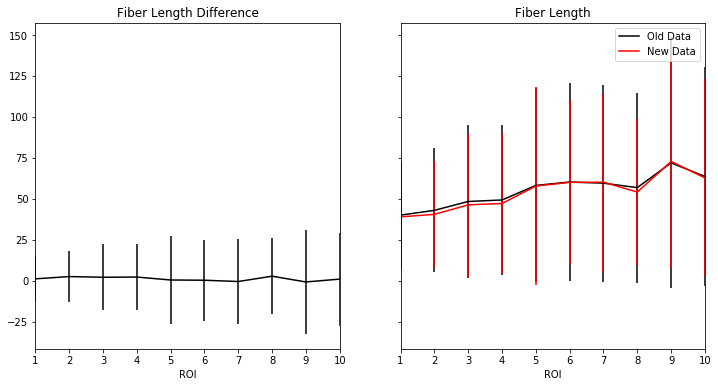

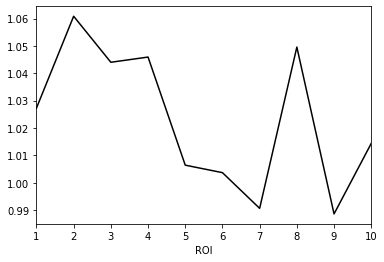

In [96]:
# Now it's going to get a bit more complicated. I want to compare the mean fiber lengths between the two data sets when grouped by ROI, Eye, Layer, and perhaps mixtures of the two. It's not difficult to do, but the commands are going to get long

# For easier comparison, going to plot the difference between the data sets instead of two curves, one for each
old_roi_mean = old_data.groupby(['ROI'],as_index=False).agg([np.mean, np.std])
new_roi_mean = new_data.groupby(['ROI'],as_index=False).agg([np.mean, np.std])

roi_mean_diff = old_roi_mean['Length']['mean'] - new_roi_mean['Length']['mean']
roi_mean_div = old_roi_mean['Length']['mean']/new_roi_mean['Length']['mean']

# Standard deviation of the difference
olv = old_roi_mean['Length']['std']
nlv = new_roi_mean['Length']['std']
num_old = olv.shape[0]
num_new = nlv.shape[0]

roi_std_diff = np.sqrt(olv**2/num_old + nlv**2/num_new)

this_fig, ax1 = plt.subplots(1,2,figsize=(12,6),sharey=True)

roi_mean_diff.plot.line(ax=ax1[0],yerr=roi_std_diff,color='black')

# For good measure, plot the individual curves
old_roi_mean['Length'].plot.line(y='mean',yerr='std',color='black',ax=ax1[1],label='Old Data')
new_roi_mean['Length'].plot.line(y='mean',yerr='std',color='red',ax=ax1[1],label='New Data')

ax1[0].set_title('Fiber Length Difference')
ax1[1].set_title('Fiber Length')

div_fig, ax2 = plt.subplots()
roi_mean_div.plot.line(ax=ax2,color='black')
ax2.set_title('')

this_fig.savefig(r'.\length_vs_roi_comparison.png',dpi=300)

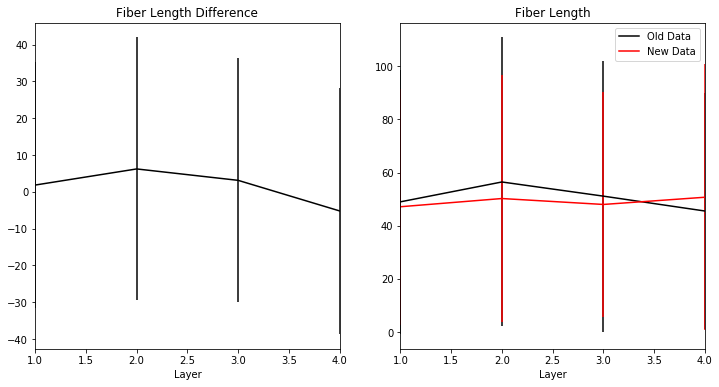

In [97]:
# Do the same as above except group by layer, not ROI
old_layer_mean = old_data.groupby(['Layer'],as_index=False).agg([np.mean, np.std])
new_layer_mean = new_data.groupby(['Layer'],as_index=False).agg([np.mean, np.std])

layer_mean_diff = old_layer_mean['Length']['mean'] - new_layer_mean['Length']['mean']

# Standard deviation of the difference
olv = old_layer_mean['Length']['std']
nlv = new_layer_mean['Length']['std']
num_old = olv.shape[0]
num_new = nlv.shape[0]

layer_std_diff = np.sqrt(olv**2/num_old + nlv**2/num_new)

l_fig, ax1 = plt.subplots(1,2,figsize=(12,6))

layer_mean_diff.plot.line(ax=ax1[0],yerr=layer_std_diff,color='black')

# For good measure, plot the individual curves
old_layer_mean['Length'].plot.line(y='mean',yerr='std',color='black',ax=ax1[1],label='Old Data')
new_layer_mean['Length'].plot.line(y='mean',yerr='std',color='red',ax=ax1[1],label='New Data')

ax1[0].set_title('Fiber Length Difference')
ax1[1].set_title('Fiber Length')

l_fig.savefig(r'.\length_vs_layer_comparison.png',dpi=300)